# Chapter 6 - String operations! Which month was the snowiest?

In [9]:
%pylab inline
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
figsize(15, 5)

# Always display all the columns
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
line_width has been deprecated, use display.width instead (currently both are
identical)



In [10]:
weather_2012 = pd.read_csv('./data/weather_2012.csv', parse_dates=True, index_col='Date/Time')

In [11]:
weather_2012.head()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)               Weather
Date/Time                                                                                                                              
2012-01-01 00:00:00      -1.8                -3.9           86                4              8.0           101.24                   Fog
2012-01-01 01:00:00      -1.8                -3.7           87                4              8.0           101.24                   Fog
2012-01-01 02:00:00      -1.8                -3.4           89                7              4.0           101.26  Freezing Drizzle,Fog
2012-01-01 03:00:00      -1.5                -3.2           88                6              4.0           101.27  Freezing Drizzle,Fog
2012-01-01 04:00:00      -1.5                -3.3           88                7              4.8           101.23                   Fog

## 6.1 String operations

In [12]:
weather_description = weather_2012['Weather']

In [13]:
is_snowing = weather_description.str.contains('Snow')

In [14]:
is_snowing[: 5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

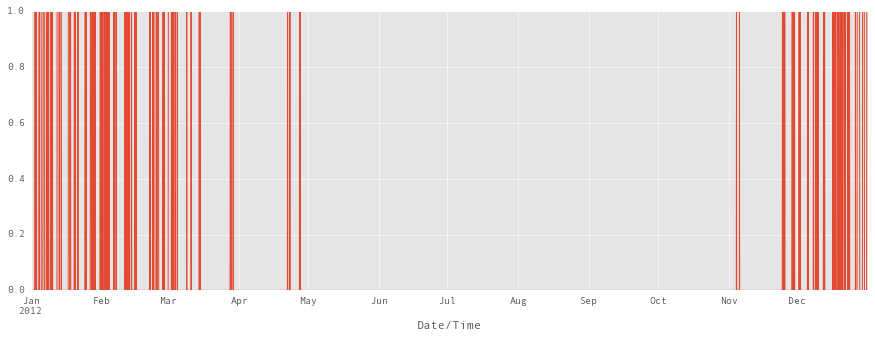

In [15]:
is_snowing.plot()

## 6.2 Use resampling to find the snowiest month

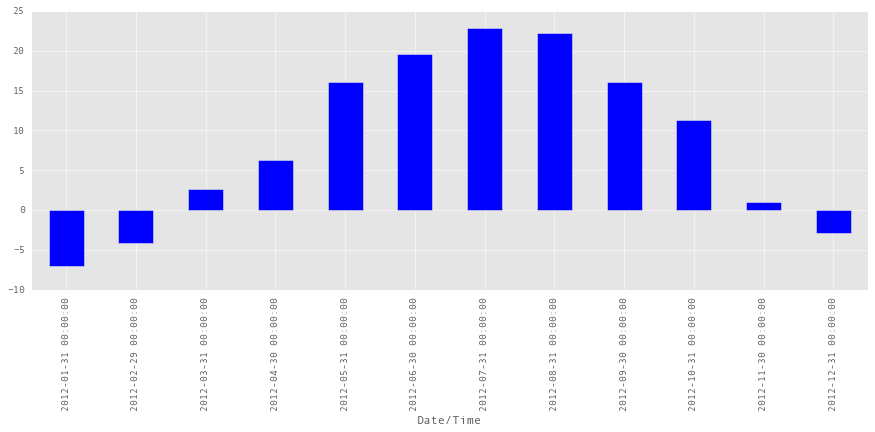

In [16]:
weather_2012[u'Temp (C)'].resample('M', how = np.median).plot(kind='bar')

In [17]:
is_snowing.astype(float)[1: 10]

Date/Time
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
2012-01-01 05:00:00    0
2012-01-01 06:00:00    0
2012-01-01 07:00:00    0
2012-01-01 08:00:00    0
2012-01-01 09:00:00    0
Name: Weather, dtype: float64

In [18]:
is_snowing.astype(float).resample('M', how = np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

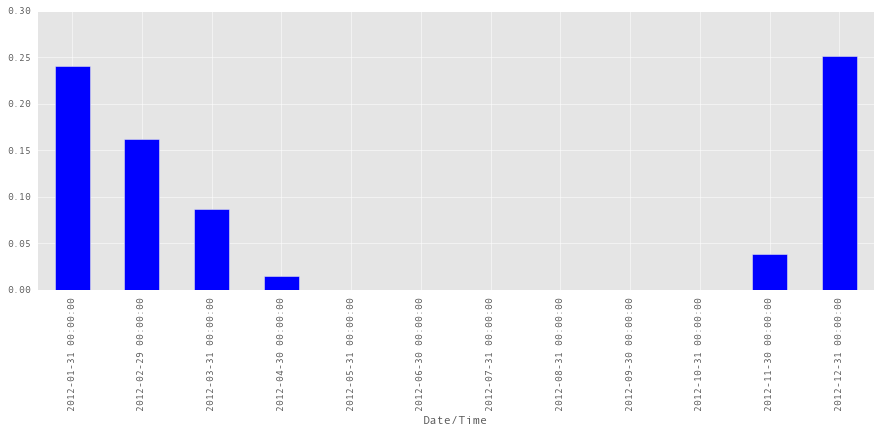

In [19]:
is_snowing.astype(float).resample('M', how = np.mean).plot(kind='bar')

## 6.3 Plotting temperature and snowiness stats together

In [21]:
temperature = weather_2012['Temp (C)'].resample('M', how = np.median)

In [23]:
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how = np.mean)

In [24]:
temperature.name = 'Temperature'
snowiness.name = 'Snowiness'

In [26]:
stats = pd.concat([temperature, snowiness], axis=1)

In [27]:
stats.head()

Temperature  Snowiness
Date/Time                         
2012-01-31        -7.05   0.240591
2012-02-29        -4.10   0.162356
2012-03-31         2.60   0.087366
2012-04-30         6.30   0.015278
2012-05-31        16.05   0.000000

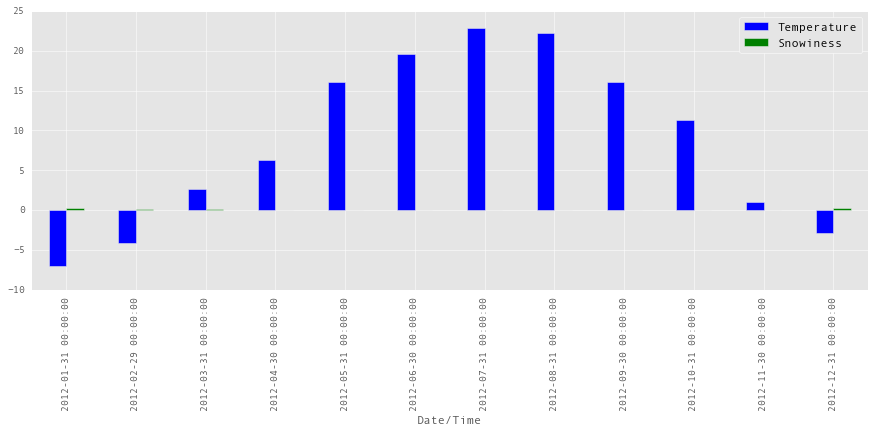

In [28]:
stats.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111855c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1118c6610>], dtype=object)

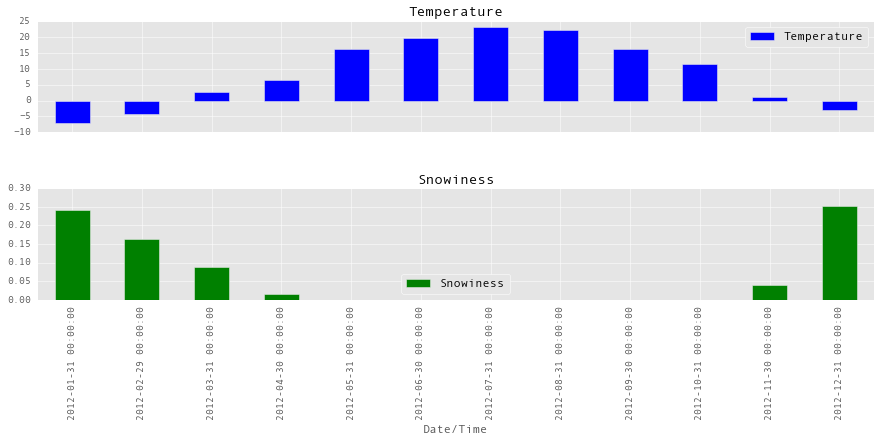

In [31]:
stats.plot(kind='bar', subplots = True)